<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/Olympics_Women_100m_Freestyle_EDA_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the necessary packages (uncomment if not already installed)
install.packages("readxl")
install.packages("readr")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("readxl")
install.packages("dplyr")

library(ggplot2)
library(readxl)
library(dplyr)
library(readr)
library(corrplot)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() 

In [ ]:
 # Load dataset
excel_file_path <- "/content/heats women 100m freestyle.xlsx"

# Import the Excel file
heats_women_100m_freestyle <- read_excel(excel_file_path)

# Display the first few rows of each dataset
cat("First few rows of the Excel dataset:\n")
head(heats_women_100m_freestyle)

First few rows of the Excel dataset:


Country,Athlete,Age,RT,Time,Time Behind,Points,Split Time
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
SWE,Sarah SJOESTROEM,30,0.62,52.99,-,929,25.44
HKG,Siobhan Bernadette,26,0.68,53.02,0.03,927,25.38
CHN,Junxuan YANG,22,0.68,53.05,0.06,926,25.62
NED,Marrit STEENBERGEN,24,0.74,53.22,0.23,917,26.03
AUS,Mollie O'CALLAGHAN,20,0.70,53.27,0.28,914,26.15
AUS,Shayna JACK,25,0.70,53.4,0.41,908,25.97


##Data Analysis

In [ ]:
# Data Types and Central Tendency Measures
summary(heats_women_100m_freestyle)

   Country            Athlete               Age              RT        
 Length:29          Length:29          Min.   :15.00   Min.   :0.6200  
 Class :character   Class :character   1st Qu.:21.00   1st Qu.:0.6500  
 Mode  :character   Mode  :character   Median :23.00   Median :0.6800  
                                       Mean   :22.69   Mean   :0.6797  
                                       3rd Qu.:24.00   3rd Qu.:0.7000  
                                       Max.   :30.00   Max.   :0.7600  
     Time           Time Behind            Points        Split Time   
 Length:29          Length:29          Min.   :510.0   Min.   :25.21  
 Class :character   Class :character   1st Qu.:789.0   1st Qu.:25.62  
 Mode  :character   Mode  :character   Median :872.0   Median :26.15  
                                       Mean   :827.4   Mean   :26.50  
                                       3rd Qu.:900.0   3rd Qu.:26.81  
                                       Max.   :929.0   Max.   :30.73  

In [ ]:
#@title Check for missing values
sum(is.na(heats_women_100m_freestyle))

[1] 0

In [ ]:
#identify missing values
missing_values <- heats_women_100m_freestyle |>
  filter(is.na(as.numeric(`Time`))) |>
  pull(`Time`)

# Print problematic entries
print(missing_values)

In [ ]:
#Remove Missing values
heats_women_100m_freestyle <- heats_women_100m_freestyle |>
  mutate(
    `Time` = as.numeric(`Time`)
  ) |>
  filter(!is.na(`Time`)) |>
  mutate(
    `Split Time 2` = `Time` - `Split Time`
  ) |>
  print()

##Data Pre-Processing

In [ ]:
# Convert all text values in the dataset to lowercase
heats_women_100m_freestyle <- heats_women_100m_freestyle |>
  mutate(across(where(is.character), tolower))

In [ ]:
# Structure of the dataset
str(heats_women_100m_freestyle)

tibble [29 × 8] (S3: tbl_df/tbl/data.frame)
 $ Country    : chr [1:29] "SWE" "HKG" "CHN" "NED" ...
 $ Athlete    : chr [1:29] "Sarah SJOESTROEM" "Siobhan Bernadette" "Junxuan YANG" "Marrit STEENBERGEN" ...
 $ Age        : num [1:29] 30 26 22 24 20 25 21 21 29 28 ...
 $ RT         : num [1:29] 0.62 0.68 0.68 0.74 0.7 0.7 0.62 0.73 0.64 0.68 ...
 $ Time       : chr [1:29] "52.99" "53.02" "53.05" "53.22" ...
 $ Time Behind: chr [1:29] "-" "0.03" "0.06" "0.23" ...
 $ Points     : num [1:29] 929 927 926 917 914 908 901 900 895 894 ...
 $ Split Time : num [1:29] 25.4 25.4 25.6 26 26.1 ...


In [ ]:
#@title Data Transformation
heats_women_100m_freestyle <- heats_women_100m_freestyle |>
  mutate(
    `Time` = as.numeric(`Time`),
    `Split Time 2` = `Time` - `Split Time`
  ) |>
  print()

# A tibble: 29 × 9
   Country Athlete             Age    RT  Time `Time Behind` Points `Split Time`
   <chr>   <chr>             <dbl> <dbl> <dbl> <chr>          <dbl>        <dbl>
 1 swe     sarah sjoestroem     30  0.62  53.0 -                929         25.4
 2 hkg     siobhan bernadet…    26  0.68  53.0 0.03             927         25.4
 3 chn     junxuan yang         22  0.68  53.0 0.06             926         25.6
 4 ned     marrit steenberg…    24  0.74  53.2 0.23             917         26.0
 5 aus     mollie o'callagh…    20  0.7   53.3 0.28             914         26.2
 6 aus     shayna jack          25  0.7   53.4 0.41             908         26.0
 7 usa     torri huske          21  0.62  53.5 0.54             901         25.5
 8 usa     gretchen walsh       21  0.73  53.5 0.55             900         25.2
 9 fra     beryl gastaldello    29  0.64  53.6 0.66             895         25.9
10 gbr     anna hopkin          28  0.68  53.7 0.68             894         25.6
# ℹ 19 mo

In [ ]:
#@title Rename Columns

heats_women_100m_freestyle |>
  rename(
    `Reaction Time` = RT,   # Use `rename()` for renaming columns
    `Total Time` = Time,
    `First Row` = `Split Time`
  ) |>
  print()


# A tibble: 29 × 9
   Country Athlete           Age `Reaction Time` `Total Time` Time.Behind Points
   <chr>   <chr>           <dbl>           <dbl>        <dbl> <chr>        <dbl>
 1 swe     sarah sjoestro…    30            0.62         53.0 -              929
 2 hkg     siobhan bernad…    26            0.68         53.0 0.03           927
 3 chn     junxuan yang       22            0.68         53.0 0.06           926
 4 ned     marrit steenbe…    24            0.74         53.2 0.23           917
 5 aus     mollie o'calla…    20            0.7          53.3 0.28           914
 6 aus     shayna jack        25            0.7          53.4 0.41           908
 7 usa     torri huske        21            0.62         53.5 0.54           901
 8 usa     gretchen walsh     21            0.73         53.5 0.55           900
 9 fra     beryl gastalde…    29            0.64         53.6 0.66           895
10 gbr     anna hopkin        28            0.68         53.7 0.68           894
# ℹ 19 mo

##Univariate Analysis

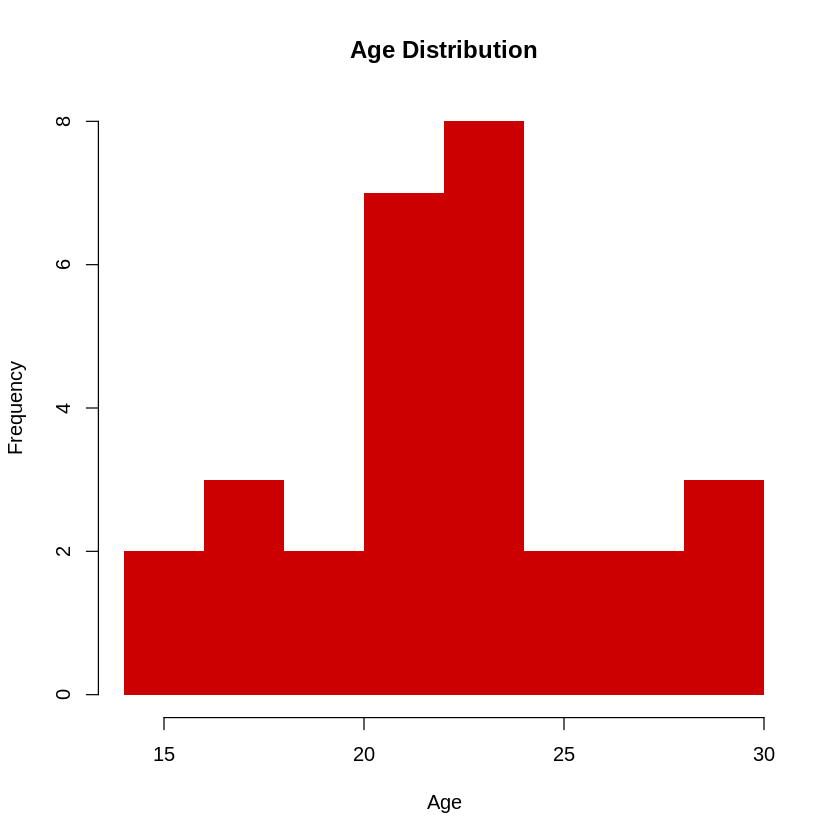

In [ ]:
#@title Age Distribution

hist(heats_women_100m_freestyle$`Age`,
  col  = "#CD0000",
  border = NA,  # No borders
  main = "Age Distribution",    # Add title to chart
  xlab = "Age"  # Add X-axis label
)

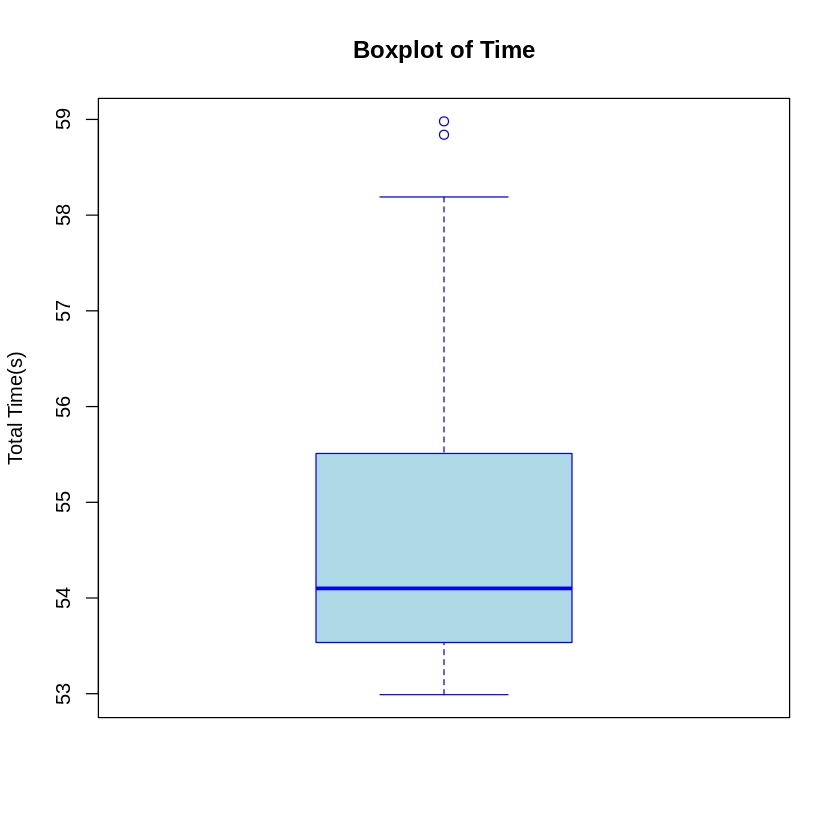

In [ ]:
#@title distribution of time
boxplot(heats_women_100m_freestyle$`Time`,
        main = "Boxplot of Time",
        ylab = "Total Time(s)",
        col = "lightblue",
        border = "blue")

##Bivariate Analysis

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


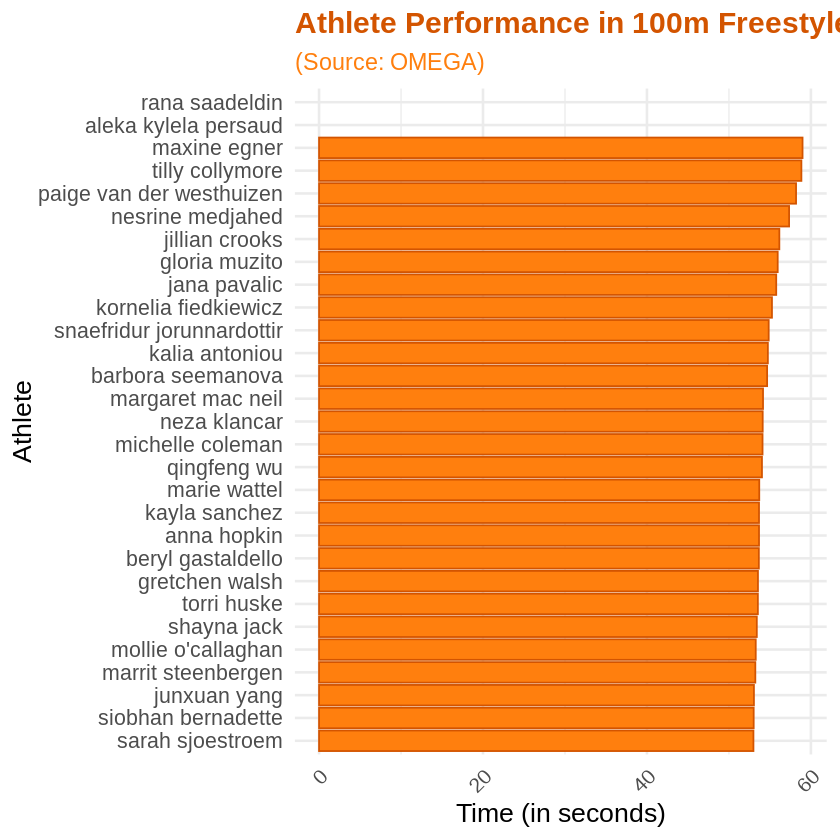

In [ ]:
#@title Athletes by Total Time in the Heats

heats_women_100m_freestyle |>
  select(Athlete, Time) |>
  arrange(Time) |>  # Arrange athletes by time
  mutate(Athlete = factor(Athlete, levels = Athlete)) |>  # Order athletes by their time
  ggplot(aes(x = Athlete, y = Time)) +
  geom_bar(stat = "identity", fill = "#FF7F0E", color = "#D35400") +  # Blue fill with a darker blue border
  coord_flip() +  # Flip the axes to get a horizontal bar plot
  labs(
    title = "Athlete Performance in 100m Freestyle",
    subtitle = "(Source: OMEGA)",
    x = "Athlete",
    y = "Time (in seconds)"
  ) +
  theme_minimal(base_size = 16) +  # Increase base font size for better readability
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels if necessary
    plot.title = element_text(color = "#D35400", size = 18, face = "bold"),  # Darker orange title
    plot.subtitle = element_text(color = "#FF7F0E", size = 14)  # Light orange subtitle
  )
  ggsave("athlete_performance_plot.png", width = 12, height = 8)  # Save plot with larger dimensions


In [ ]:
#@title Compare the first 50 m against the second 50 m

# Load necessary libraries
library(ggalluvial)
library(ggplot2)
library(dplyr)  # For data manipulation

# Prepare the data for the Sankey diagram
sankey_data <- heats_women_100m_freestyle %>%
  # Select relevant columns for the Sankey diagram
  select(Athlete, `Split Time`, `Split Time 2`) %>%
  # Pivot to long format and rename columns
  pivot_longer(cols = c(`Split Time`, `Split Time 2`),
               names_to = "Split",
               values_to = "Time") %>%
  # Rename columns in the 'Split' variable for clarity
  mutate(Split = recode(Split,
                        `Split Time` = "First 50m",
                        `Split Time 2` = "Second 50m")) %>%
  # Ensure 'Athlete' is treated as a factor for proper alluvial diagram
  mutate(Athlete = factor(Athlete))

# Create the Sankey diagram to compare the first 50m split times against the second 50m split times
ggplot(sankey_data,
       aes(x = Split, stratum = Athlete, alluvium = Athlete, y = Time, fill = Athlete, label = Athlete)) +
  geom_flow() +  # Draw the flows connecting First 50m and Second 50m
  geom_stratum(width = 0.6) +  # Draw the blocks on the sides
  geom_text(stat = "stratum", size = 3) +  # Add labels for each athlete
  scale_x_discrete(limits = c("First 50m", "Second 50m"), expand = c(0.15, 0.15)) +
  labs(
    title = "Comparison of Split Times: First 50m vs Second 50m",
    x = "Row",
    y = "Time (s)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 12, face = "bold"),  # Customize axis text
    panel.grid = element_blank(),  # Remove grid for clarity
    legend.position = "none"  # Remove the legend
  )


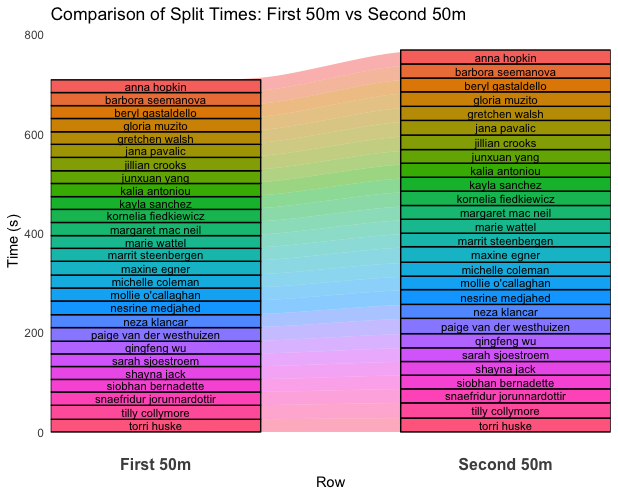